<a href="https://colab.research.google.com/github/ashimashahi15/ADFUSECASE-2/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [34]:
df = pd.read_csv('/content/heart_disease.csv')

In [35]:
df.tail(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
915,915,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN
916,916,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN
917,917,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect
918,918,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN
919,919,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN


| Column Name           | Description                                                                                                                        |
| --------------------- | ---------------------------------------------------------------------------------------------------------------------------------- |
| `id`                  | Unique identifier for each patient (sometimes not present in all versions).                                                        |
| `age`                 | Age of the patient (in years).                                                                                                     |
| `sex`                 | Gender of the patient: `1` = male, `0` = female.                                                                                   |
| `dataset` or `target` | Indicates whether the patient has heart disease: `0` = no, `1` = yes (some datasets use 0–4 to indicate severity).                 |
| `cp`                  | Chest pain type: <br> `0` = typical angina, <br> `1` = atypical angina, <br> `2` = non-anginal pain, <br> `3` = asymptomatic       |
| `trestbps`            | Resting blood pressure (in mm Hg).                                                                                                 |
| `chol`                | Serum cholesterol level (in mg/dl).                                                                                                |
| `fbs`                 | Fasting blood sugar > 120 mg/dl: `1` = true, `0` = false.                                                                          |
| `restecg`             | Resting electrocardiographic results: <br> `0` = normal, <br> `1` = ST-T wave abnormality, <br> `2` = left ventricular hypertrophy |
| `thalch` or `thalach` | Maximum heart rate achieved (bpm).                                                                                                 |
| `exang`               | Exercise-induced angina: `1` = yes, `0` = no.                                                                                      |
| `oldpeak`             | ST depression induced by exercise relative to rest (a float number).                                                               |
| `slope`               | Slope of the peak exercise ST segment: <br> `0` = upsloping, <br> `1` = flat, <br> `2` = downsloping                               |
| `ca`                  | Number of major vessels (0–3) colored by fluoroscopy.                                                                              |
| `thal`                | Thalassemia: <br> `1` = normal, <br> `2` = fixed defect, <br> `3` = reversible defect.                                             |


In [36]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [37]:
selected_columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalch','exang','oldpeak','slope','ca','thal']
new_df = df[selected_columns]

In [38]:
new_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN
916,62,Male,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN
917,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect
918,58,Male,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN


### Handling Missing Values

In [39]:
num_cols =['trestbps','chol','thalch','oldpeak','ca']
cat_cols =['fbs','restecg','exang','slope','thal']

for col in num_cols:
  new_df[col].fillna(new_df[col].mean(),inplace=True)

for col in cat_cols:
  new_df[col].fillna(new_df[col].mode()[0],inplace=True)

In [40]:
new_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63,Male,typical angina,145.000000,233.0,True,lv hypertrophy,150.000000,False,2.300000,downsloping,0.000000,fixed defect
1,67,Male,asymptomatic,160.000000,286.0,False,lv hypertrophy,108.000000,True,1.500000,flat,3.000000,normal
2,67,Male,asymptomatic,120.000000,229.0,False,lv hypertrophy,129.000000,True,2.600000,flat,2.000000,reversable defect
3,37,Male,non-anginal,130.000000,250.0,False,normal,187.000000,False,3.500000,downsloping,0.000000,normal
4,41,Female,atypical angina,130.000000,204.0,False,lv hypertrophy,172.000000,False,1.400000,upsloping,0.000000,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,flat,0.676375,normal
916,62,Male,typical angina,132.132404,139.0,False,st-t abnormality,137.545665,False,0.878788,flat,0.676375,normal
917,55,Male,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.000000,flat,0.676375,fixed defect
918,58,Male,asymptomatic,132.132404,385.0,True,lv hypertrophy,137.545665,False,0.878788,flat,0.676375,normal


In [41]:
new_df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


### converting boolean to int

In [42]:
new_df['fbs'] = new_df['fbs'].astype(int)
new_df['exang'] = new_df['exang'].astype(int)

### Label encode to categorical Columns

In [43]:
label_cols =['sex','cp','restecg','thalch','slope', 'thal']
le = LabelEncoder()
for col in label_cols:
  new_df[col] = le.fit_transform(new_df[col])

In [49]:
new_df
print("\nMeans before scaling:\n", new_df.mean())
print("\nStandard deviations before scaling:\n", new_df.std())


Means after scaling:
 age          53.510870
sex           0.789130
cp            0.782609
trestbps    132.132404
chol        199.130337
fbs           0.150000
restecg       0.990217
thalch       64.243478
exang         0.366304
oldpeak       0.878788
slope         1.152174
ca            0.676375
thal          1.158696
dtype: float64

Standard deviations after scaling:
 age           9.424685
sex           0.408148
cp            0.956350
trestbps     18.443895
chol        108.957634
fbs           0.357266
restecg       0.631863
thalch       24.992871
exang         0.482056
oldpeak       1.053774
slope         0.516007
ca            0.541667
thal          0.483493
dtype: float64


In [45]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    int64  
 2   cp        920 non-null    int64  
 3   trestbps  920 non-null    float64
 4   chol      920 non-null    float64
 5   fbs       920 non-null    int64  
 6   restecg   920 non-null    int64  
 7   thalch    920 non-null    int64  
 8   exang     920 non-null    int64  
 9   oldpeak   920 non-null    float64
 10  slope     920 non-null    int64  
 11  ca        920 non-null    float64
 12  thal      920 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 93.6 KB


In [46]:
scale = StandardScaler()
scaled_data = scale.fit_transform(new_df)

In [47]:
new_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63,1,3,145.000000,233.0,1,0,77,0,2.300000,0,0.000000,0
1,67,1,0,160.000000,286.0,0,0,34,1,1.500000,1,3.000000,1
2,67,1,0,120.000000,229.0,0,0,55,1,2.600000,1,2.000000,2
3,37,1,2,130.000000,250.0,0,1,113,0,3.500000,0,0.000000,1
4,41,0,1,130.000000,204.0,0,0,99,0,1.400000,2,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,0,0,127.000000,333.0,1,2,81,0,0.000000,1,0.676375,1
916,62,1,3,132.132404,139.0,0,2,64,0,0.878788,1,0.676375,1
917,55,1,0,122.000000,223.0,1,2,27,0,0.000000,1,0.676375,0
918,58,1,0,132.132404,385.0,1,0,64,0,0.878788,1,0.676375,1


In [50]:
scaled_data

array([[ 1.00738556e+00,  5.16930973e-01,  2.31986001e+00, ...,
        -2.23408054e+00, -1.24937135e+00, -2.39781342e+00],
       [ 1.43203377e+00,  5.16930973e-01, -8.18774121e-01, ...,
        -2.95067241e-01,  4.29209870e+00, -3.28405966e-01],
       [ 1.43203377e+00,  5.16930973e-01, -8.18774121e-01, ...,
        -2.95067241e-01,  2.44494202e+00,  1.74100149e+00],
       ...,
       [ 1.58089143e-01,  5.16930973e-01, -8.18774121e-01, ...,
        -2.95067241e-01, -2.05075588e-16, -2.39781342e+00],
       [ 4.76575299e-01,  5.16930973e-01, -8.18774121e-01, ...,
        -2.95067241e-01, -2.05075588e-16, -3.28405966e-01],
       [ 9.01223507e-01,  5.16930973e-01,  2.27437256e-01, ...,
        -2.95067241e-01, -2.05075588e-16, -3.28405966e-01]])

In [48]:
print("\nMeans after scaling:\n", scaled_data.mean())
print("\nStandard deviations after scaling:\n", scaled_data.std())



Means after scaling:
 -9.624408293740487e-17

Standard deviations after scaling:
 1.0


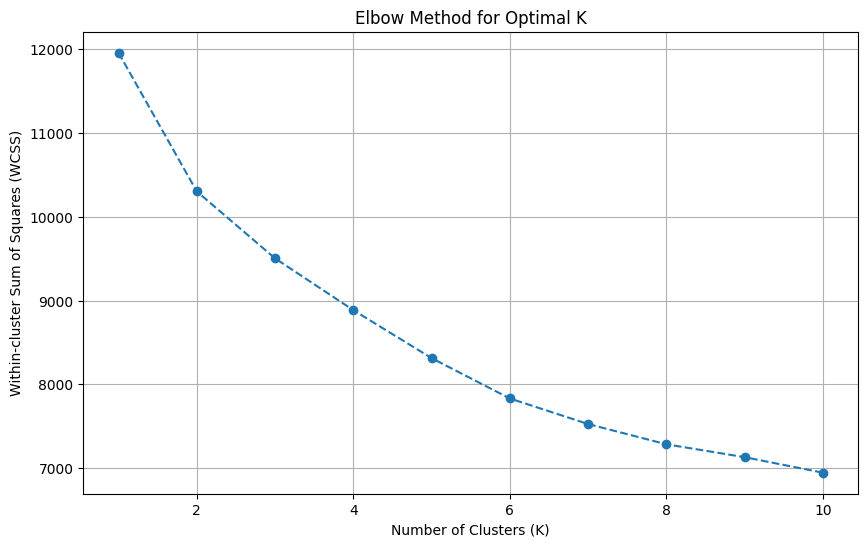

In [51]:
wcss = [] # Within-cluster sum of squares
for i in range(1, 11): # Try k from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_) # inertia is the WCSS

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

In [53]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_data)
print(clusters)

[0 2 2 1 1 1 2 1 2 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 2 1 1 2 1 2 1 0 1 1 1 1 2
 2 2 0 2 1 1 0 1 1 1 2 0 0 1 1 1 1 2 2 1 1 1 1 2 1 2 1 2 2 1 1 2 1 1 0 2 1
 1 1 2 1 1 2 2 1 1 0 1 1 1 1 1 1 1 2 2 1 1 2 2 2 1 1 1 1 1 0 2 1 2 1 2 1 2
 0 1 0 2 1 0 1 0 2 0 2 1 2 0 1 0 2 1 1 1 1 1 1 1 1 2 2 2 0 1 1 0 2 1 1 0 1
 1 1 0 1 1 2 2 2 1 1 2 1 0 2 1 1 0 1 1 0 1 1 2 2 2 1 2 2 0 2 1 0 1 2 1 2 1
 1 0 2 1 2 1 2 0 0 1 2 0 1 1 1 1 1 0 1 1 2 2 2 1 2 1 1 1 0 1 1 1 1 2 1 1 1
 1 2 2 1 1 1 2 2 1 2 1 2 1 2 0 1 1 1 1 1 1 1 0 2 1 2 1 0 2 2 2 1 1 1 1 1 1
 1 1 0 1 1 2 2 0 0 1 1 2 1 2 2 1 1 1 1 1 1 2 1 2 1 1 2 0 1 1 1 1 1 2 2 2 1
 0 2 1 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 2 1 2 1 1 1 1 0 1 0 1 1 1 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 1 1 2 1 2 1 1 1 1 1 1 2 1 1 1 2 1 2 1 1 1 2 1 1 1 1 2 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 2 1 2 1 1 1 1 2 0 1 1 1 2
 1 1 2 2 1 1 2 2 1 1 2 1 

In [62]:
new_df['cluster'] = clusters

In [63]:
new_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,cluster
0,63,1,3,145.000000,233.0,1,0,77,0,2.300000,0,0.000000,0,0
1,67,1,0,160.000000,286.0,0,0,34,1,1.500000,1,3.000000,1,2
2,67,1,0,120.000000,229.0,0,0,55,1,2.600000,1,2.000000,2,2
3,37,1,2,130.000000,250.0,0,1,113,0,3.500000,0,0.000000,1,1
4,41,0,1,130.000000,204.0,0,0,99,0,1.400000,2,0.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,0,0,127.000000,333.0,1,2,81,0,0.000000,1,0.676375,1,0
916,62,1,3,132.132404,139.0,0,2,64,0,0.878788,1,0.676375,1,1
917,55,1,0,122.000000,223.0,1,2,27,0,0.000000,1,0.676375,0,0
918,58,1,0,132.132404,385.0,1,0,64,0,0.878788,1,0.676375,1,0


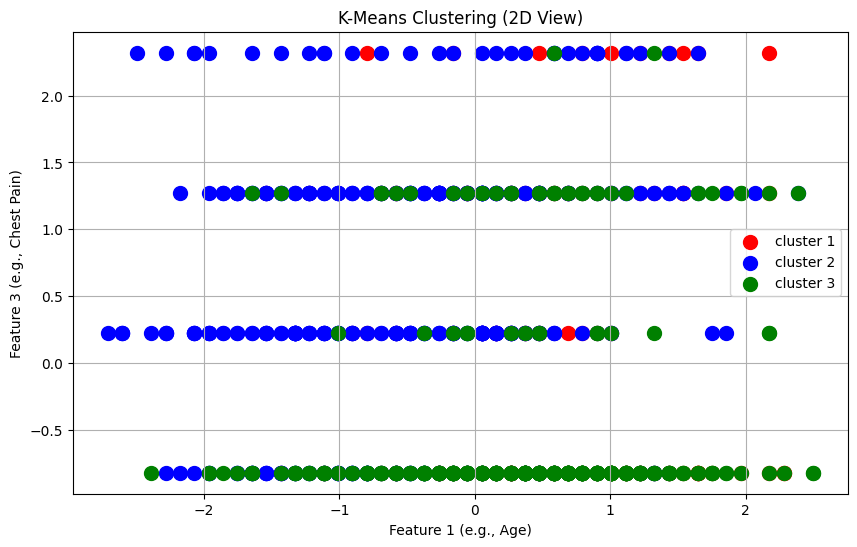

In [64]:
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[clusters == 0,0], scaled_data[clusters == 0,2],s=100,c='red', label = 'cluster 1')
plt.scatter(scaled_data[clusters == 1,0], scaled_data[clusters == 1,2],s=100,c='blue', label = 'cluster 2')
plt.scatter(scaled_data[clusters == 2,0], scaled_data[clusters == 2,2],s=100,c='green', label = 'cluster 3')

plt.title('K-Means Clustering (2D View)')
plt.xlabel('Feature 1 (e.g., Age)')
plt.ylabel('Feature 3 (e.g., Chest Pain)')
plt.legend()
plt.grid(True)
plt.show()


Manual 2D Plots ✅ Good when you want to interpret feature relationships directly
❌ Tedious and limited when dimensions > 3



Option 1: Pairplot (Seaborn)

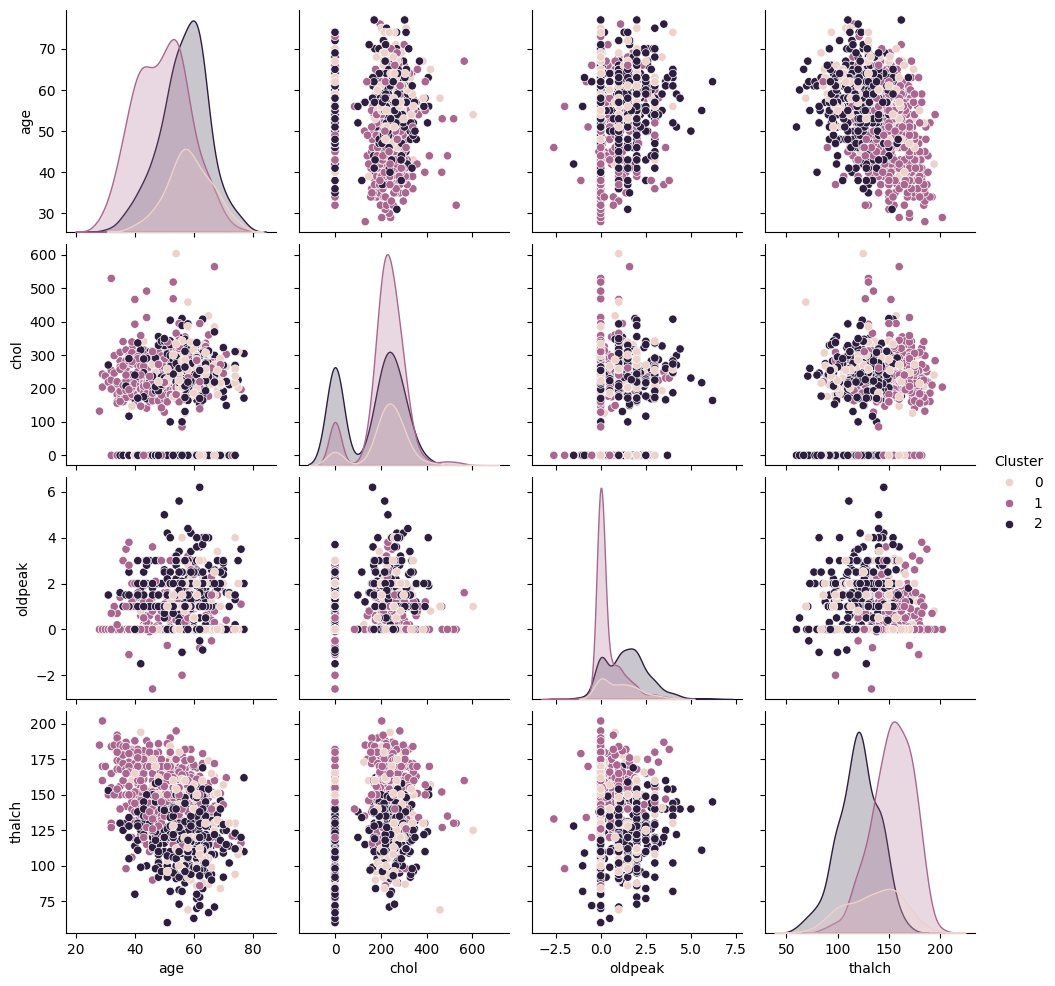

In [61]:
df['Cluster'] = clusters
sns.pairplot(df, hue='Cluster', vars=['age', 'chol', 'oldpeak', 'thalch'])


Option 2: PCA (Principal Component Analysis) for 2D/3D Plotting
PCA reduces high-dimensional data (13 features here) to 2 or 3 components

In [67]:
pca = PCA(n_components=2)
scaled_pca = pca.fit_transform(scaled_data)

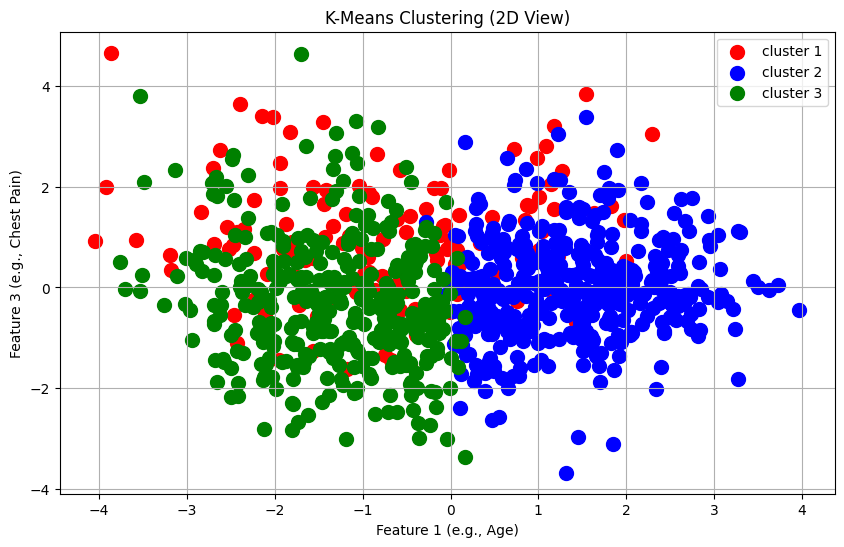

In [69]:
plt.figure(figsize=(10, 6))
plt.scatter(scaled_pca[clusters == 0,0], scaled_pca[clusters == 0,1],s=100,c='red', label = 'cluster 1')
plt.scatter(scaled_pca[clusters == 1,0], scaled_pca[clusters == 1,1],s=100,c='blue', label = 'cluster 2')
plt.scatter(scaled_pca[clusters == 2,0], scaled_pca[clusters == 2,1],s=100,c='green', label = 'cluster 3')

plt.title('K-Means Clustering (2D View)')
plt.xlabel('Feature 1 (e.g., Age)')
plt.ylabel('Feature 3 (e.g., Chest Pain)')
plt.legend()
plt.grid(True)
plt.show()